In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'your_stock_data.csv' with your actual file path
data = pd.read_csv('bac.csv')

print('Head')
print(data.head())
print('Tail')
print(data.tail())
print('Dtypes')
print(data.dtypes)
print('Desc')
print(data.describe())


                        Date      Open      High       Low     Close  Volume  \
0  1973-02-21 00:00:00-05:00  1.561252  1.561252  1.561252  1.561252   99200   
1  1973-02-22 00:00:00-05:00  1.566527  1.566527  1.566527  1.566527   47200   
2  1973-02-23 00:00:00-05:00  1.561252  1.561252  1.561252  1.561252  133600   
3  1973-02-26 00:00:00-05:00  1.561252  1.561252  1.561252  1.561252   24000   
4  1973-02-27 00:00:00-05:00  1.561252  1.561252  1.561252  1.561252   41600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
                            Date       Open       High        Low      Close  \
12943  2024-06-18 00:00:00-04:00  39.560001  40.020000  39.459999  39.990002   
12944  2024-06-20 00:00:00-04:00  39.779999  40.310001  39.750000  39.990002   
12945  2024-06-21 00:00:00-04:00  39.849998  39.910000  39.369999  39.490002   
12946  2024-06-24 00:00:0

In [32]:
pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 816.9 kB/s eta 0:00:00


In [29]:
data['Date'] = pd.to_datetime(data['Date'],utc=True)

# Calculate the date 15 years ago from today
fifteen_years_ago = pd.Timestamp('today').year - 15

# Filter for dates within the last 15 years (inclusive)
data= data[data['Date'].dt.year >= fifteen_years_ago]

# Calculate the date 15 years ago from today
five_years_ago = pd.Timestamp('today').year - 5
one_year_ago = pd.Timestamp('today').year - .25

# Filter for dates within the last 15 years (inclusive)
data_5Y= data[data['Date'].dt.year >= five_years_ago]

data_1Y= data[data['Date'].dt.year >= one_year_ago]

<Figure size 1500x700 with 0 Axes>

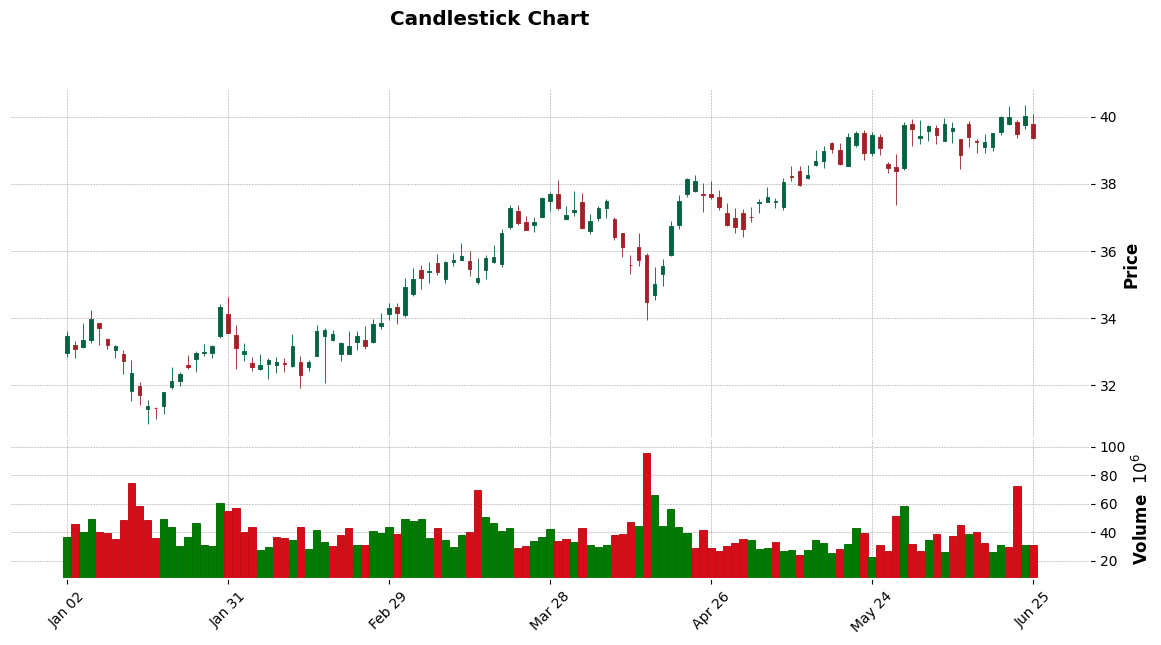

In [34]:
import mplfinance as mpf

# Set the Date column as the index
data_1Y.set_index('Date', inplace=True)

# Create a candlestick chart
plt.figure(figsize=(15, 7))
mpf.plot(data_1Y, type='candle', style='charles',
         title='Candlestick Chart',
         ylabel='Price',
         volume=True,
         figsize=(15, 7))
plt.show()

In [4]:
data['Daily Return'] = (data['Close'] - data['Open']) / data['Open'] * 100

<ipython-input-4-bfc707f38b05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Daily Return'] = (data['Close'] - data['Open']) / data['Open'] * 100


In [5]:
data['Moving Average'] = data['Close'].rolling(window=50).mean()

<ipython-input-5-79efd75cec6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Moving Average'] = data['Close'].rolling(window=50).mean()


In [6]:
# Define a threshold for volume increase (e.g., 2x average volume)
volume_threshold = data['Volume'].mean() * 2

data['High Volume'] = data['Volume'] > volume_threshold

<ipython-input-6-7786f777a6df>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['High Volume'] = data['Volume'] > volume_threshold


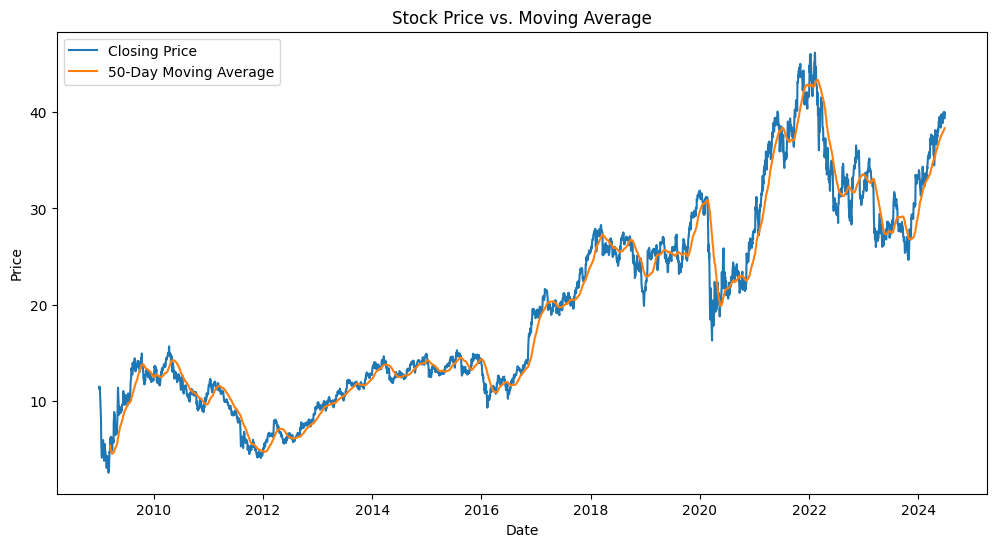

In [7]:
plt.figure(figsize=(12, 6))

plt.plot(data['Date'], data['Close'], label='Closing Price')
plt.plot(data['Date'], data['Moving Average'], label='50-Day Moving Average')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price vs. Moving Average')
plt.legend()

plt.show()

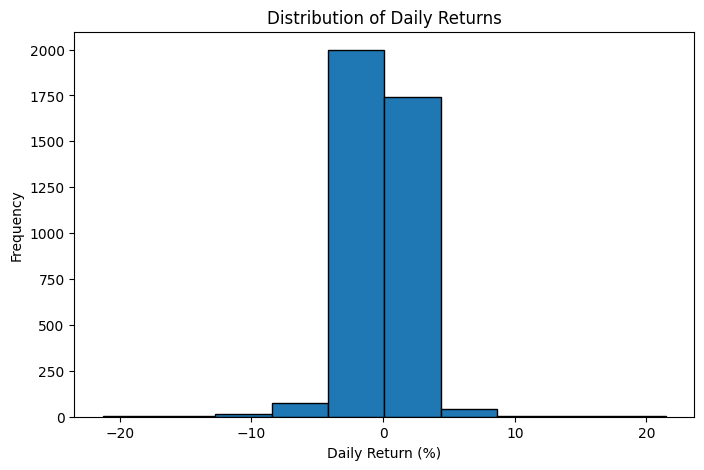

In [8]:
plt.figure(figsize=(8, 5))

plt.hist(data['Daily Return'], bins=10, edgecolor='black')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Returns')

plt.show()

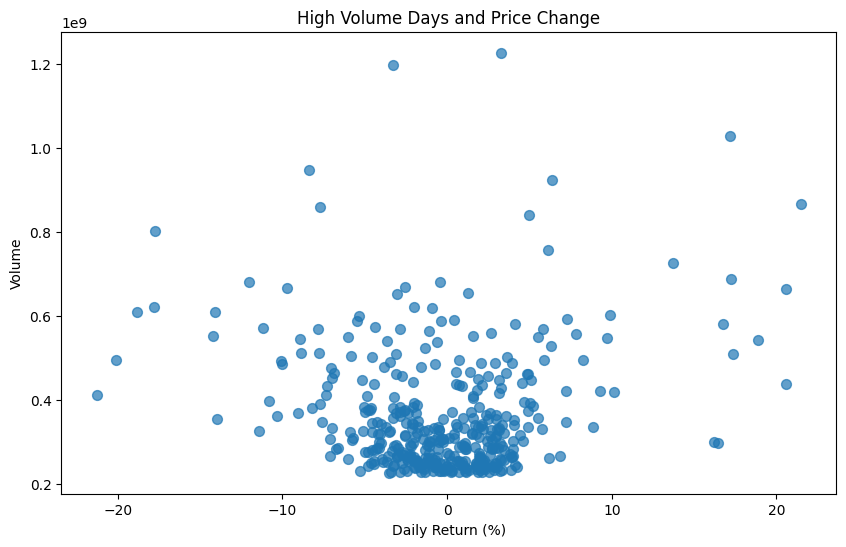

In [9]:
high_volume_days = data[data['High Volume'] == True]

plt.figure(figsize=(10, 6))

plt.scatter(high_volume_days['Daily Return'], high_volume_days['Volume'], s=50, alpha=0.7)
plt.xlabel('Daily Return (%)')
plt.ylabel('Volume')
plt.title('High Volume Days and Price Change')

plt.show()

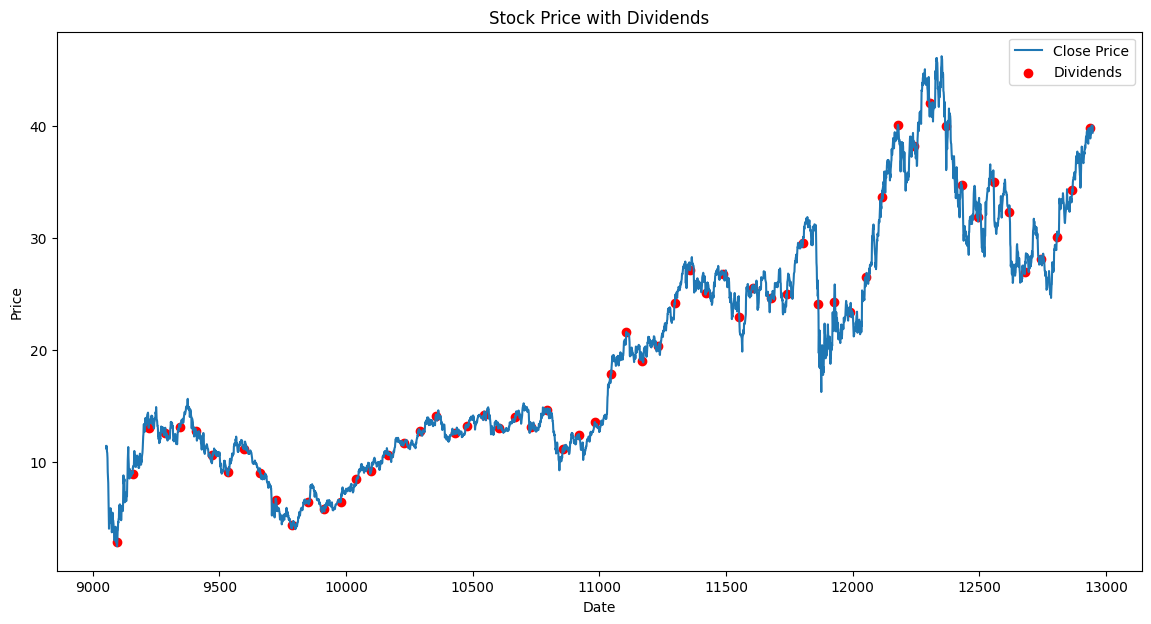

In [10]:
dividends = data[data['Dividends'] != 0]

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close Price')
plt.scatter(dividends.index, dividends['Close'], color='red', label='Dividends')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price with Dividends')
plt.legend()
plt.show()

<ipython-input-12-6753b9aa5cc9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_5Y['MA20'] = data_5Y['Close'].rolling(window=20).mean()
<ipython-input-12-6753b9aa5cc9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_5Y['Upper_Band'] = data_5Y['MA20'] + 2 * data_5Y['Close'].rolling(window=20).std()
<ipython-input-12-6753b9aa5cc9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

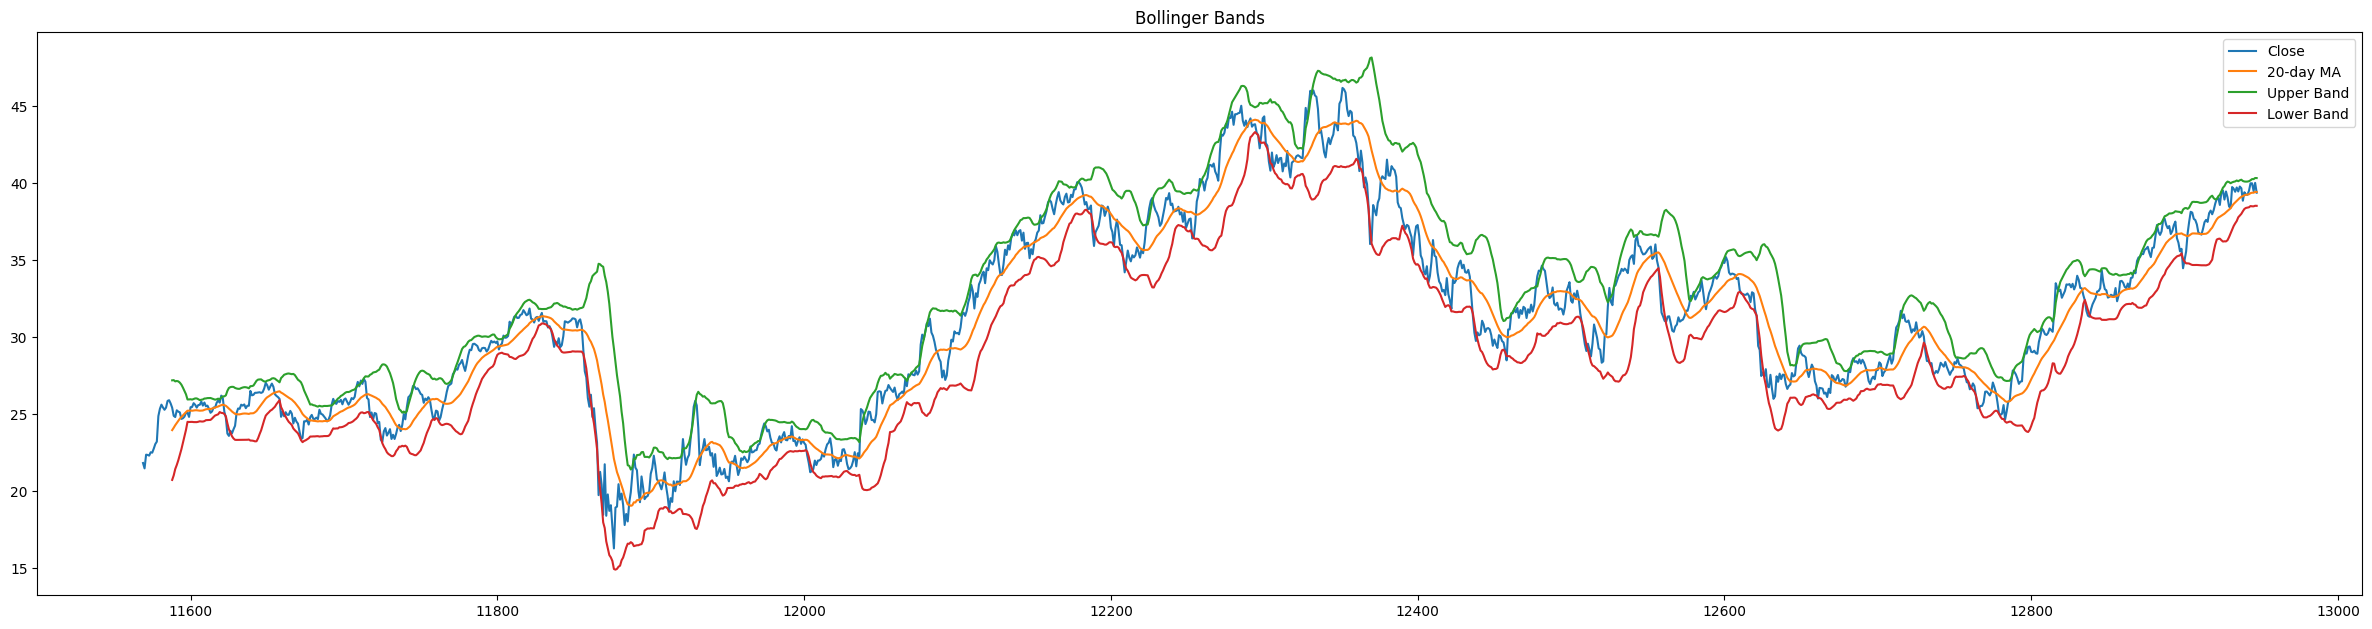

In [12]:
data_5Y['MA20'] = data_5Y['Close'].rolling(window=20).mean()
data_5Y['Upper_Band'] = data_5Y['MA20'] + 2 * data_5Y['Close'].rolling(window=20).std()
data_5Y['Lower_Band'] = data_5Y['MA20'] - 2 * data_5Y['Close'].rolling(window=20).std()

plt.figure(figsize=(30, 60))
plt.subplot(7, 1, 4)
plt.plot(data_5Y.index, data_5Y['Close'], label='Close')
plt.plot(data_5Y.index, data_5Y['MA20'], label='20-day MA')
plt.plot(data_5Y.index, data_5Y['Upper_Band'], label='Upper Band')
plt.plot(data_5Y.index, data_5Y['Lower_Band'], label='Lower Band')
plt.title('Bollinger Bands')
plt.legend()

In [13]:
jpm_data = pd.read_csv('jpm.csv')
wfc_data = pd.read_csv('wfc.csv')
citi_data = pd.read_csv('C.csv')
bac_data = pd.read_csv('bac.csv')

# Convert 'Date' column to datetime
jpm_data['Date'] = pd.to_datetime(jpm_data['Date'],utc=True)
wfc_data['Date'] = pd.to_datetime(wfc_data['Date'],utc=True)
citi_data['Date'] = pd.to_datetime(citi_data['Date'],utc=True)
bac_data['Date'] = pd.to_datetime(bac_data['Date'],utc=True)


# Calculate the date 15 years ago from today
fifteen_years_ago = pd.Timestamp('today').year - 15

# Filter for dates within the last 15 years (inclusive)
jpm_data= jpm_data[jpm_data['Date'].dt.year >= fifteen_years_ago]
wfc_data= wfc_data[wfc_data['Date'].dt.year >= fifteen_years_ago]
citi_data= citi_data[citi_data['Date'].dt.year >= fifteen_years_ago]
bac_data= bac_data[bac_data['Date'].dt.year >= fifteen_years_ago]



# Set 'Date' column as index
jpm_data.set_index('Date', inplace=True)
wfc_data.set_index('Date', inplace=True)
citi_data.set_index('Date', inplace=True)
bac_data.set_index('Date', inplace=True)

merged_data = pd.DataFrame({
    'JPM': jpm_data['Close'],
    'WFC': wfc_data['Close'],
    'CITI': citi_data['Close'],
    'BAC': bac_data['Close']
})

# Drop rows with missing values (if any)
merged_data.dropna(inplace=True)

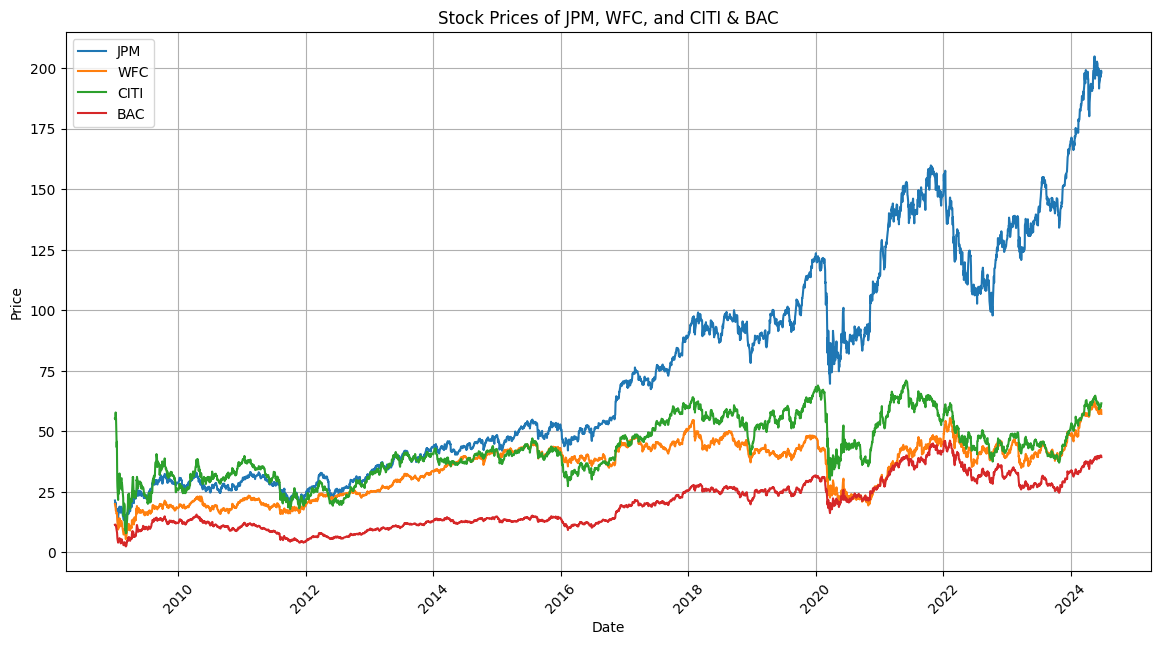

In [15]:
# Plot the closing prices
plt.figure(figsize=(14, 7))
plt.plot(merged_data.index, merged_data['JPM'], label='JPM')
plt.plot(merged_data.index, merged_data['WFC'], label='WFC')
plt.plot(merged_data.index, merged_data['CITI'], label='CITI')
plt.plot(merged_data.index, merged_data['BAC'], label='BAC')


plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices of JPM, WFC, and CITI & BAC')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

**Calculate 52-week high, 52-week low, and average dividend**

In [37]:
def calculate_metrics(stock_data):
    last_52_weeks = stock_data.last('52W')
    high_52_week = last_52_weeks['High'].max()
    low_52_week = last_52_weeks['Low'].min()
    avg_dividend = last_52_weeks['Dividends'].mean()
    return high_52_week, low_52_week, avg_dividend

# Calculate metrics for each stock
jpm_high, jpm_low, jpm_avg_dividend = calculate_metrics(jpm_data)
wfc_high, wfc_low, wfc_avg_dividend = calculate_metrics(wfc_data)
citi_high, citi_low, citi_avg_dividend = calculate_metrics(citi_data)
bac_high, bac_low, bac_avg_dividend = calculate_metrics(bac_data)

In [39]:
# Create a DataFrame to summarize the metrics
summary_df = pd.DataFrame({
    'Stock': ['JPM', 'WFC', 'CITI', 'BAC'],
    '52-Week High': [jpm_high, wfc_high, citi_high,bac_high],
    '52-Week Low': [jpm_low, wfc_low, citi_low,bac_low ],
    'Average Dividend': [jpm_avg_dividend, wfc_avg_dividend, citi_avg_dividend, bac_avg_dividend]
})

# Display the summary table
print(summary_df)

  Stock  52-Week High  52-Week Low  Average Dividend
0   JPM    205.880005   133.582271          0.017206
1   WFC     62.549999    37.569393          0.005668
2  CITI     64.980003    37.003071          0.008583
3   BAC     40.340000    24.440499          0.003887
